UNIDAD 10 - Dataframes con pandas   

1. Cargue el dataset

In [347]:
import pandas as pd
import matplotlib
from sodapy import Socrata
client = Socrata('www.datos.gov.co', None)
results = client.get('32sa-8pi3', limit=8000)
df = pd.DataFrame(results)
df = df.dropna()
df

,valor,unidad,vigenciadesde,vigenciahasta
0,4761.64,COP,2022-12-22T00:00:00.000,2022-12-22T00:00:00.000
1,4781.28,COP,2022-12-20T00:00:00.000,2022-12-20T00:00:00.000
2,4802.48,COP,2022-12-17T00:00:00.000,2022-12-19T00:00:00.000
3,4836.24,COP,2022-12-13T00:00:00.000,2022-12-13T00:00:00.000
4,4815.99,COP,2022-12-10T00:00:00.000,2022-12-12T00:00:00.000
...,...,...,...,...
7593,4195.93,COP,2023-07-07T00:00:00.000,2023-07-07T00:00:00.000
7594,4189.96,COP,2023-07-08T00:00:00.000,2023-07-10T00:00:00.000
7595,4154.06,COP,2023-07-11T00:00:00.000,2023-07-11T00:00:00.000
7596,4193.59,COP,2023-07-12T00:00:00.000,2023-07-12T00:00:00.000


In [348]:
df.loc[:,"valor"]=df.loc[:,"valor"].astype(float)
df.info() # Analizar el data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7598 entries, 0 to 7597
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   valor          7598 non-null   object
 1   unidad         7598 non-null   object
 2   vigenciadesde  7598 non-null   object
 3   vigenciahasta  7598 non-null   object
dtypes: object(4)
memory usage: 237.6+ KB


Como se puede analizar solo la columna valor es de tipo numérico, es por ello que los calculos solo se realizarán sobre ella

2. Calculos

Para realizar este ejercicio se utilizan los módulos incluidos en pandas como "mean", "max" y "std" entre otros. Notar que se selecciona la columna valor, de no ser así arroja un error ya que el resto de la información no es numérica

3. Presentar el resumen de los datos numéricos

In [349]:
print("Resumen de calculos")
print("La media del TRM es: "+str(df["valor"].mean().__round__(3))) 
print("La mediana del TRM es: "+str(df["valor"].median().__round__(3)))
print("La desviación estandar de la TRM es: "+str(df["valor"].std().__round__(3)))
print("El máximo de la media para la TRM es: "+str(df["valor"].max().__round__(3)))
print("El mínimo del TRM es: "+str(df["valor"].min().__round__(3)))
print("El rango del TRM es: "+str((df["valor"].max()-df["valor"].min()).__round__(3)))

Resumen de calculos
La media del TRM es: 2215.846
La mediana del TRM es: 2164.775
La desviación estandar de la TRM es: 951.714
El máximo de la media para la TRM es: 5061.21
El mínimo del TRM es: 620.62
El rango del TRM es: 4440.59


4 Información general del dataset

In [350]:
df.describe() #Descripción de la columna "valor" con el modulo "describe" de pandas

,valor,unidad,vigenciadesde,vigenciahasta
count,7598.00,7598,7598,7598
unique,7410.00,1,7598,7598
top,1797.68,COP,2022-12-22T00:00:00.000,2022-12-22T00:00:00.000
freq,4.00,7598,1,1


5 Representaciones graficas de la información

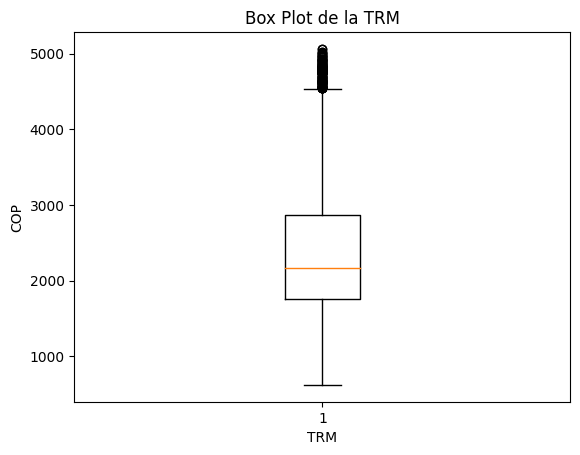

In [351]:
import matplotlib.pyplot as plt

data = df["valor"]

fig, ax = plt.subplots()
ax.boxplot(data)

ax.set_title('Box Plot de la TRM')
ax.set_xlabel('TRM')
ax.set_ylabel('COP')

plt.show()

Analisis

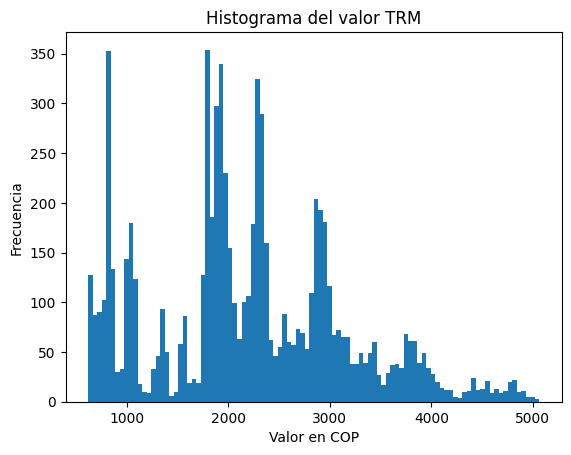

In [352]:
data = df["valor"]

fig, ax = plt.subplots()
ax.hist(data, bins=100)

ax.set_title('Histograma del valor TRM')
ax.set_xlabel('Valor en COP')
ax.set_ylabel('Frecuencia')

plt.show()

Análisis

In [353]:
from sodapy import Socrata
import json
client = Socrata('www.datos.gov.co', None)
results = client.get('kgxf-xxbe', limit=1500)
datos = pd.DataFrame(results)
datos = datos[["fami_tienecomputador","cole_bilingue","punt_ingles","punt_global"]]
datos = datos.dropna()
datos

,fami_tienecomputador,cole_bilingue,punt_ingles,punt_global
1,Si,N,71,339
2,Si,N,71,339
5,No,N,46,199
6,No,N,46,199
7,Si,N,59,272
...,...,...,...,...
1493,Si,N,57,279
1494,Si,N,43,245
1496,No,N,36,249
1497,No,N,36,249


Resultados de las pruebas de Saber 11 del 2010 asl 2021

- Comparación colegio bilingüe y puntaje inglés

In [354]:
biling_punt_ing=datos[["cole_bilingue","punt_ingles"]]

biling_punt_ing.loc[:,"punt_ingles"]=biling_punt_ing.loc[:,"punt_ingles"].astype(int)
biling_punt_ing.groupby("cole_bilingue").mean()

,punt_ingles
cole_bilingue,
N,49.80568
S,73.846154


Mirando los datos uno podría concluir que los estudiantes de colegios bilingüe tienden a un mejor puntaje en la parte de inglés

In [355]:
biling_punt_ing.groupby("cole_bilingue").size().to_frame()


,0
cole_bilingue,
N,669
S,13


Pero luego de revisar los datos, no sería correcto afirmarlo ya que la muestra de los estudiantes de colegios bilingüe es muy pequeña para considerarse representativa.

- Comparación puntaje globar y acceso a computador familiar

In [356]:
compu_global=datos[["fami_tienecomputador","punt_global"]]

compu_global.loc[:,"punt_global"]=compu_global.loc[:,"punt_global"].astype(int)
compu_global.groupby("fami_tienecomputador").mean()


,punt_global
fami_tienecomputador,
No,233.04
Si,265.914005


<Axes: ylabel='Frequency'>

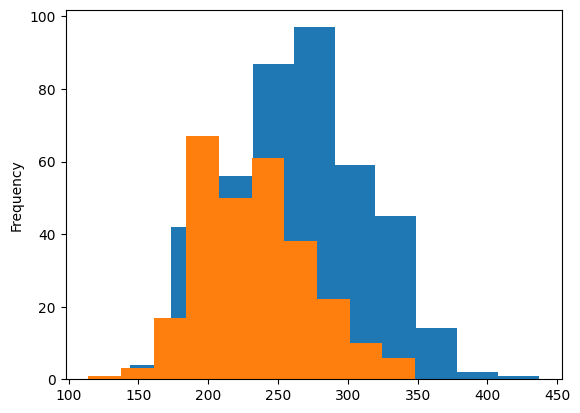

In [357]:
compu_global_mask=compu_global["fami_tienecomputador"]=="Si"
compu_global[compu_global_mask]["punt_global"].plot(kind='hist')
compu_global[~compu_global_mask]["punt_global"].plot(kind='hist')

Análisis